In [1]:
import pennylane as qml
from pennylane import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Data preparation

# Load digits dataset
digits = datasets.load_digits(n_class=2)

# Split dataset
sample_train, sample_test, label_train, label_test = train_test_split(
     digits.data, digits.target, test_size=0.2, random_state=22)

# Reduce dimensions
n_dim = 4
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)

# Normalise
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# Scale
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

# Select
train_size = 100
X = sample_train[:train_size]
Y = label_train[:train_size]

test_size = 20
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

# shift label from {0, 1} to {-1, 1}
Y = Y * 2 - np.ones(len(Y)) 
label_test = label_test * 2 - np.ones(len(label_test))

for i in range(10):
    print("X = {}, Y = {: d}".format(X[i], int(Y[i])))

print("...")

X = [-0.79923362 -0.26571862 -0.16474421 -0.17815209], Y = -1
X = [-0.81630337 -0.2918343  -0.48757339 -0.44903275], Y = -1
X = [-0.8857451  -0.29703903 -0.27973225  0.17301948], Y = -1
X = [-0.76039807 -0.27000038 -0.26925903  0.32714174], Y = -1
X = [-0.73871156 -0.11343435 -0.47219408 -0.49067011], Y = -1
X = [ 0.78786325 -0.59573349 -0.4920569   0.05387855], Y =  1
X = [ 0.39958822 -0.54294278  0.8919327  -0.61020082], Y =  1
X = [ 0.59776664 -0.3451937  -0.95910006  0.02118022], Y =  1
X = [ 0.21238989  0.90675747 -0.01334434 -0.16475638], Y =  1
X = [ 0.5672546  -0.35245554 -0.42810247  0.62548925], Y =  1
...


In [4]:
# Initialize quantum device
dev = qml.device("default.qubit", wires=4)

In [6]:
def statepreparation(x):
    # TODO:
    # Encode data to circuit with angle encoding
    pass

def layer(W):
    # TODO:
    # Define parametrized ansatz layer
    pass

@qml.qnode(dev, interface="autograd")
def circuit(weights, x):

    statepreparation(x)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))

(<Figure size 400x200 with 1 Axes>, <Axes: >)

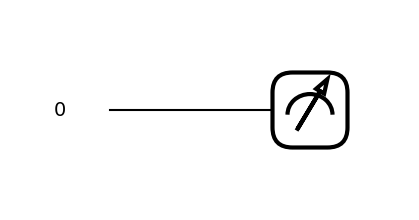

In [8]:
#Create initial weights from normal distribution
np.random.seed(0)
num_qubits = 4
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)

#print initialized circuit
qml.draw_mpl(circuit,decimals=2, expansion_strategy='device')(weights_init,X[0])

In [9]:
# Cost and accuracy functions

def cost(weights, data, labels):
    # TODO: Implement cost function 
    # 1. evaluate the parametrized (=weights) circuit for given data
    # 2. return the square loss between circuit expecation value and labels
    pass

def accuracy(weights, data, labels):
    # TODO: Implement accuracy function
    # 1. evaluate the parametrized (=weights) circuit for given data
    # 2. classify the outcomes and compare them to labels
    # 3. return percentage of correctly classified data
    pass

In [ ]:
# Train model

weights = weights_init
opt = qml.GradientDescentOptimizer(stepsize=0.4)

for it in range(25):

    weights = opt.step(cost, weights, X, Y)
    
    print(
        "Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(
            it + 1, cost(weights, X, Y), accuracy(weights, X, Y)
        )
    )

In [ ]:
# Evaluate model on test set; accuracy should be at least > 0.75

print("Evaluate test set:  Cost: {:0.7f} | Accuracy: {:0.7f} ".format(
            cost(weights, sample_test, label_test), accuracy(weights, sample_test, label_test)
        ))